# ENSO notebook

In this notebook, you can run the example commands. If you are accessing from docker image, you can check the output files by going back to ./ENSO_forecat/ and click ./results/ directory. 

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt

## Training

If you want to use a pretrained model, you can skip the training. Run the following command to train an example CNN model using CNRM dataset. Edit "--epoch" to change the number of training epochs. 

In [2]:
!python train.py --dataroot "./datasets/CNRM_tas_anomalies_regridded.nc" --name test_cnn --startdate 1980-01-01 --enddate 2101-12-31   --dataset CNRM --num_input_time_steps 2 --epoch 5

Training Set: Epoch 01. loss: 0.002389
Training Set: Epoch 02. loss: 0.000083
Training Set: Epoch 03. loss: 0.000099
Training Set: Epoch 04. loss: 0.000109
Training Set: Epoch 05. loss: 0.000194


C:\Users\feilo\anaconda3\lib\site-packages\xarray\coding\times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\feilo\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


## Testing

You can test the model that you just trained or load from a pretrained model. Run the following command to use a pretrained CNN model and compare its prediction with ground truth.

In [5]:
!python test.py --dataroot "./datasets/sst.mon.mean.trefadj.anom.1880to2018.nc" --instrument_data "./datasets/nino34.long.anom.data.txt" --name NinoPrediction_leadtime1_timespan1850-01-01-2299-01-01.pt  --startdate "" --enddate ""  --test_start 2002-01-01 --test_end 2015-12-31 --dataset observations --compare_ground_truth --num_input_time_steps 2

You can open check the output image and and file:


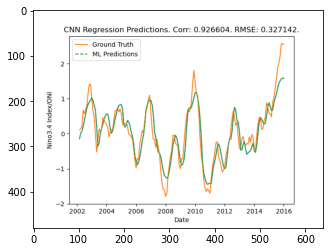

In [12]:
plt.imshow(plt.imread('./results/NinoPrediction_leadtime1_timespan1850-01-01-2299-01-01.png'))

In [13]:
f=open('./results/NinoPrediction_leadtime1_timespan1850-01-01-2299-01-01_Nino34index_prediction_leadtime1.txt')
for i in f.readlines():
    print(i)
f.close()

2002-03-01   -0.1462802141904831

2002-04-01   0.015544712543487549

2002-05-01   0.07200741767883301

2002-06-01   0.2064586579799652

2002-07-01   0.3761776089668274

2002-08-01   0.5589474439620972

2002-09-01   0.7349792718887329

2002-10-01   0.8406426310539246

2002-11-01   0.9161359667778015

2002-12-01   0.9626426100730896

2003-01-01   1.0305182933807373

2003-02-01   0.9426023960113525

2003-03-01   0.8162868618965149

2003-04-01   0.6648673415184021

2003-05-01   0.20529867708683014

2003-06-01   -0.3509805202484131

2003-07-01   -0.25288695096969604

2003-08-01   0.019565626978874207

2003-09-01   0.1596304178237915

2003-10-01   0.27052807807922363

2003-11-01   0.4142562747001648

2003-12-01   0.5044532418251038

2004-01-01   0.5663020014762878

2004-02-01   0.5533851385116577

2004-03-01   0.3851640224456787

2004-04-01   0.13684256374835968

2004-05-01   0.014443442225456238

2004-06-01   0.08375785499811172

2004-07-01   0.2557709217071533

2004-08-01   0.4264801144599

Besides CNN, you can use linear regression. This model will be trained in runtime. Use the following example command to train a linear regression model and output the prediction only. The "--classification" allows the prediction to be converted to discrete labels.

In [16]:
!python test.py --dataroot "./datasets/CNRM_tas_anomalies_regridded.nc" --dataroot1  "./datasets/sst.mon.mean.trefadj.anom.1880to2018.nc" --dataset CNRM --name linear_classification --startdate 1950-01-01 --enddate 2050-12-31 --instrument_data "" --test_start 2002-01-01 --test_end 2015-12-31  --model linear_regression --classification 

C:\Users\feilo\anaconda3\lib\site-packages\xarray\coding\times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\feilo\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


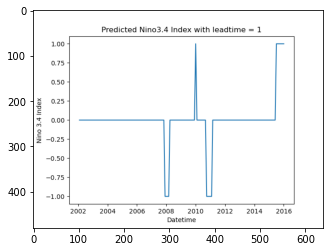

In [17]:
plt.imshow(plt.imread('./results/linear_classification_forecast.png'))

In [18]:
f=open('./results/linear_classification_Nino34index_prediction_leadtime1.txt')
for i in f.readlines():
    print(i)
f.close()

2002-02-01   0

2002-03-01   0

2002-04-01   0

2002-05-01   0

2002-06-01   0

2002-07-01   0

2002-08-01   0

2002-09-01   0

2002-10-01   0

2002-11-01   0

2002-12-01   0

2003-01-01   0

2003-02-01   0

2003-03-01   0

2003-04-01   0

2003-05-01   0

2003-06-01   0

2003-07-01   0

2003-08-01   0

2003-09-01   0

2003-10-01   0

2003-11-01   0

2003-12-01   0

2004-01-01   0

2004-02-01   0

2004-03-01   0

2004-04-01   0

2004-05-01   0

2004-06-01   0

2004-07-01   0

2004-08-01   0

2004-09-01   0

2004-10-01   0

2004-11-01   0

2004-12-01   0

2005-01-01   0

2005-02-01   0

2005-03-01   0

2005-04-01   0

2005-05-01   0

2005-06-01   0

2005-07-01   0

2005-08-01   0

2005-09-01   0

2005-10-01   0

2005-11-01   0

2005-12-01   0

2006-01-01   0

2006-02-01   0

2006-03-01   0

2006-04-01   0

2006-05-01   0

2006-06-01   0

2006-07-01   0

2006-08-01   0

2006-09-01   0

2006-10-01   0

2006-11-01   0

2006-12-01   0

2007-01-01   0

2007-02-01   0

2007-03-01   0

2007-04-

## Reforecast

The model prediction can be evaluated against the reforecast data. The example commands use a CNN model first and then a linear gression model. You also switch between regresion and classification with "--classification". Change "--leadtime" to vary the lead time.

In [19]:
!python reforecast.py --dataroot "./datasets/sst.mon.mean.trefadj.anom.1880to2018.nc" --instrument_data "./datasets/nino34.long.anom.data.txt" --name NinoPrediction_leadtime2_timespan1850-01-01-2299-01-01.pt  --startdate "" --enddate "" --test_start 1992-01-01 --test_end 2015-12-31   --dataset observations  --leadtime 2 --reforecast_data reforecast.txt --compare_ground_truth --num_input_time_steps 2

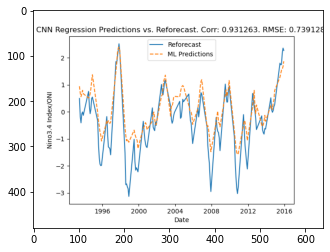

In [20]:
plt.imshow(plt.imread('./results/NinoPrediction_leadtime2_timespan1850-01-01-2299-01-01_Reforecast.png'))

In [22]:
!python reforecast.py --dataroot "./datasets/CNRM_tas_anomalies_regridded.nc" --dataroot1  "./datasets/sst.mon.mean.trefadj.anom.1880to2018.nc" --instrument_data "./datasets/nino34.long.anom.data.txt" --dataset CNRM --name LR   --startdate 1950-01-01 --enddate 2050-12-31 --test_start 1992-01-01 --test_end 2015-12-31  --leadtime 2 --reforecast_data reforecast.txt --model linear_regression --compare_ground_truth --classification 

C:\Users\feilo\anaconda3\lib\site-packages\xarray\coding\times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\feilo\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


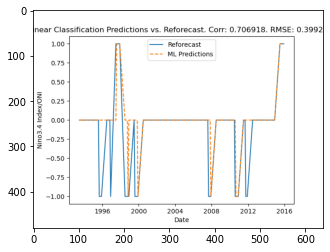

In [23]:
plt.imshow(plt.imread('./results/LR_Reforecast.png'))